In [1]:
import cv2
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Identificando donde esta ubicado la cara

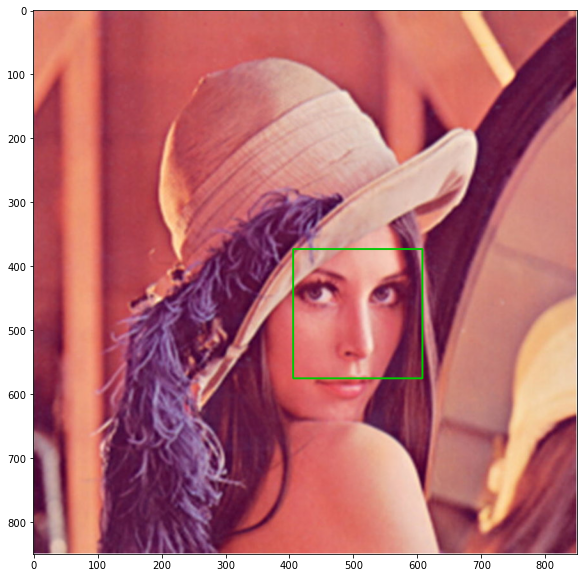

In [17]:
faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades +"haarcascade_frontalface_default.xml")
image = cv2.imread('../PDITARRAGA/Lena256.jpg')
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = faceClassif.detectMultiScale(gray,
	scaleFactor=1.10,
	minNeighbors=5,
	minSize=(80,80),
	maxSize=(220,220))

for (x,y,w,h) in faces:
	image=cv2.rectangle(image,(x,y),(x+w,y+h),(0,200,0),2)

rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
## Definicion de tamanos
plt.figure(figsize = (20,10))
plt.imshow(rgb_img)